# Dimension Reduction and PCA

### Create 2D Data Set with 3 Variables

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

a = np.random.normal(0, 1, 100) 
b = np.random.normal(0, 1, 100)

x = (3*a) - (2*b)
y = (-7*a) - b
z = (8*a) - (10*b)

A = np.row_stack([x, y, z]) #places data into a matrix stacking each variable as a row (not column)
A = A.T #correct format for PCA
df = pd.DataFrame(data= A
                 , columns =['x','y','z'])
df.head(15)

,x,y,z
0,0.363635,3.016672,4.152761
1,5.738442,-12.364324,16.146940
2,-5.325400,0.904084,-23.689650
3,3.825537,-6.326306,12.342563
4,2.520025,-2.084751,9.845612
5,-0.641117,6.070133,2.057339
6,-1.472652,6.076591,-1.752623
7,2.052724,1.104571,10.328028
8,3.047726,1.373114,15.114485
9,4.799958,-6.863106,16.371366


### Standardize Data

In [32]:
features = ['x', 'y', 'z']

# Separating out the features
A = df.loc[:, features].values #df.loc accesses a group of rows or columns

# Standardizing the features by subtracting the mean
A1 = StandardScaler().fit_transform(A)

pd.DataFrame(data = A1, columns = features).head(15)

,x,y,z
0,-0.069052,0.653743,0.196079
1,1.546462,-1.792617,1.205066
2,-1.779013,0.317734,-2.146110
3,0.971497,-0.832265,0.885030
4,0.579098,-0.157643,0.674979
5,-0.371051,1.139398,0.019806
6,-0.620987,1.140425,-0.300700
7,0.438640,0.349622,0.715562
8,0.737710,0.392334,1.118213
9,1.264380,-0.917644,1.223946


### Find Covariance Matrix

In [34]:
M = np.cov(A1.T)
print(M)
M.shape

[[ 1.01010101 -0.75734188  0.96723748]
 [-0.75734188  1.01010101 -0.53256445]
 [ 0.96723748 -0.53256445  1.01010101]]


(3, 3)

### Find Eigenvalues and Eigenvectors

In [35]:
e, v = np.linalg.eig(M) #command finds the eigenvalues and vectors associated, stores them separately into e and then v
print (e)
print (v)

[2.52881414e+00 2.57498016e-17 5.01488889e-01]
[[ 0.62814983 -0.76216689  0.15661873]
 [-0.51711752 -0.25852073  0.81593903]
 [ 0.58139252  0.59352225  0.5565196 ]]


### Sort Eigenvalues/vectors Largest to Smallest

In [36]:
idx = np.argsort(e)[::-1]
e = e[idx] #orders eigen values based on index of largest to smallest eigenvalues
e = np.real_if_close(e) #adjusts eigenvalues to be real numbers
v = v[:, idx] #adjusts the eigenvectors to correspond to eigenvalues

### Determine Amount of Variance and Select Principle Components

In [41]:
expvar = e/e.sum() #will give the percent of variance covered by each eigenvalue/vector
print(expvar) 

[0.83450867 0.16549133]


### Selecting PCs

In [42]:
cutoff = 0.05
cutind = np.where(expvar > cutoff)
e = e[cutind]
print(e)
v = v[cutind]
print(v)
v.shape

[2.52881414 0.50148889]
[[ 0.62814983  0.15661873 -0.76216689]
 [-0.51711752  0.81593903 -0.25852073]]


(2, 3)

### Dimension Reduction and Change of Basis for PCA
In this section we will perform matrix multiplication of the standardized data and the vectors of the principal components to get a new data matrix that will have n rows and m columns (where n= # of observations, and m= # of PCs)

In [39]:
PCdata = A1.dot(v.T)
PCdata.shape
principalDf = pd.DataFrame(data = PCdata
             , columns = ['PC 1', 'PC 2'])
principalDf.head(15)

,PC 1,PC 2
0,-0.090431,0.518432
1,-0.227809,-2.573903
2,0.567970,1.734024
3,-0.194643,-1.410255
4,-0.175376,-0.602584
5,-0.069720,1.116436
6,0.017723,1.329378
7,-0.215088,-0.126546
8,-0.327426,-0.350443
9,-0.282351,-1.718990


### Plot Data in Reduced Dimensions

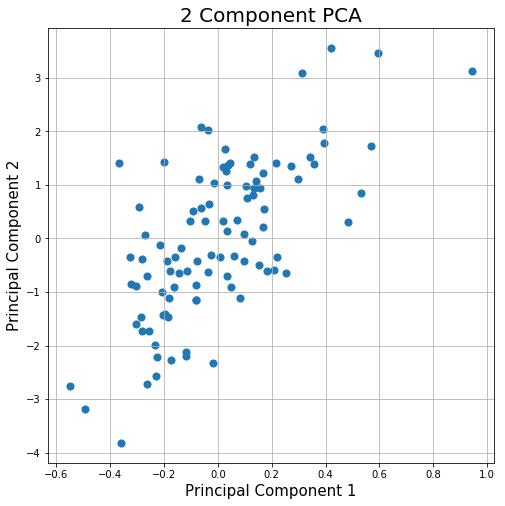

In [43]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(principalDf.loc[:, 'PC 1']
               , principalDf.loc[:, 'PC 2']
               , s = 50)
ax.grid()

## Test against PCA packages

In [44]:
from sklearn.decomposition import PCA

A2 = StandardScaler().fit_transform(A) #subtracts the mean

pca = PCA(n_components=2) #choosing 2 principal components and assigning them to the variable "pca"
principalComponents = pca.fit_transform(A2) #gives you 2D data, with 2 principle components

principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

principalDf1.head(15)

,PC 1,PC 2
0,0.267438,0.631721
1,-2.599020,-0.549818
2,2.529525,-1.213728
3,-1.555175,-0.034386
4,-0.837708,0.337710
5,0.810764,0.882588
6,1.154632,0.665914
7,-0.510759,0.752193
8,-0.910630,1.057967
9,-1.980343,0.130434


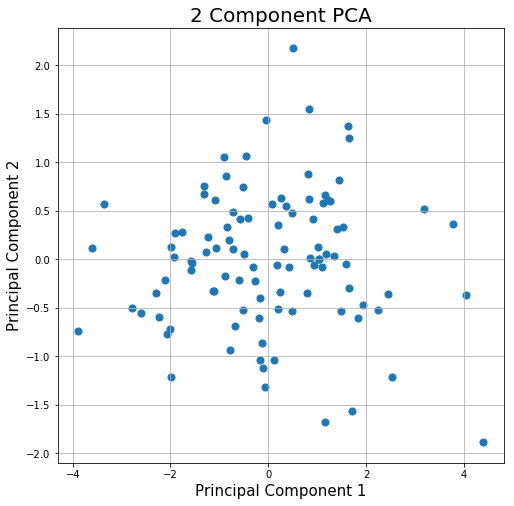

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(principalDf1.loc[:, 'PC 1']
               , principalDf1.loc[:, 'PC 2']
               , s = 50)
ax.grid()